In [ ]:
!mkdir sitting_well
!mkdir sitting_wrong

In [ ]:
# Unzip the files
!unzip /content/good.zip

!unzip /content/bad.zip

Archive:  /content/good.zip
  inflating: good/video17_frame5.jpg  
  inflating: good/video22_frame5.jpg  
  inflating: good/video23_frame107.jpg  
  inflating: good/video23_frame113.jpg  
  inflating: good/video23_frame119.jpg  
  inflating: good/video23_frame125.jpg  
  inflating: good/video23_frame137.jpg  
  inflating: good/video23_frame149.jpg  
  inflating: good/video23_frame17.jpg  
  inflating: good/video23_frame173.jpg  
  inflating: good/video23_frame191.jpg  
  inflating: good/video23_frame215.jpg  
  inflating: good/video23_frame23.jpg  
  inflating: good/video23_frame233.jpg  
  inflating: good/video23_frame251.jpg  
  inflating: good/video23_frame269.jpg  
  inflating: good/video23_frame281.jpg  
  inflating: good/video23_frame29.jpg  
  inflating: good/video23_frame293.jpg  
  inflating: good/video23_frame323.jpg  
  inflating: good/video23_frame35.jpg  
  inflating: good/video23_frame47.jpg  
  inflating: good/video23_frame53.jpg  
  inflating: good/video23_frame71.jpg  

In [ ]:
# Remove zip files
!rm -rf /content/sitting_well/good.zip
!rm -rf /content/sitting_wrong/bad.zip

In [ ]:
#mostrar cantidad de im de c/u
!ls /content/good | wc -l #103
!ls /content/bad | wc -l #259

245
485


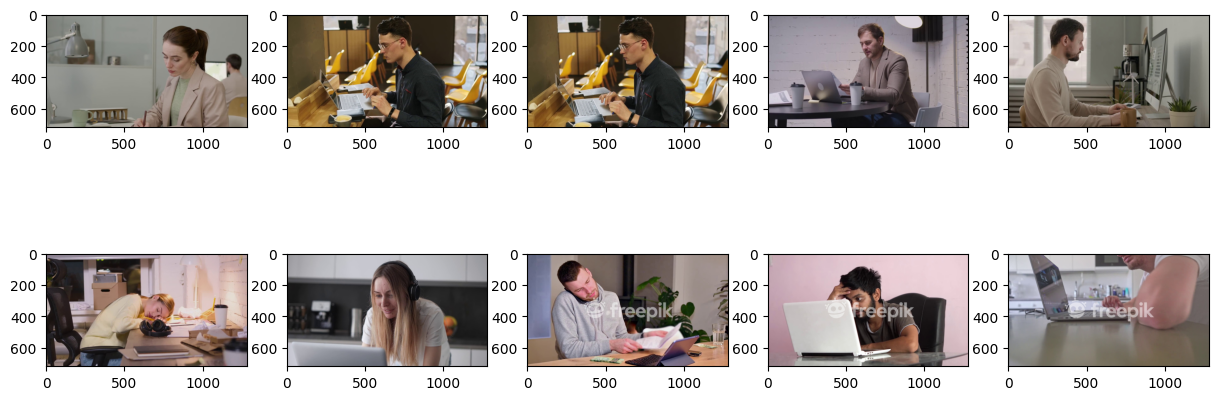

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15, 15))

folder_good = '/content/good'
images_good = os.listdir(folder_good)

folder_bad = '/content/bad'
images_bad = os.listdir(folder_bad)

for i in range(5):
    plt.subplot(5, 5, i + 1)
    image_good = mpimg.imread(os.path.join(folder_good, images_good[i]))
    plt.imshow(image_good)

    plt.subplot(5, 5, i + 6)
    image_bad = mpimg.imread(os.path.join(folder_bad, images_bad[i]))
    plt.imshow(image_bad)

In [ ]:
#borrar zips
!rm -rf /content/dataset

In [ ]:
#crear crpeta dataset

!mkdir dataset
!mkdir dataset/sitting_well
!mkdir dataset/sitting_wrong

In [ ]:
#copiar imagenes originales a la carpeta dataset
#con misma cantidad
import shutil

carpeta_fuente = '/content/good'
carpeta_destino = '/content/dataset/sitting_well'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i<245:
    #copiar de fuente a destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)


In [ ]:
#copiar imagenes originales a la carpeta dataset
#con misma cantidad
import shutil

carpeta_fuente = '/content/bad'
carpeta_destino = '/content/dataset/sitting_wrong'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i<245:
    #copiar de fuente a destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)


In [ ]:
#mostrar cantidad de im de c/u del nuevo datset
!ls /content/dataset/sitting_well | wc -l #
!ls /content/dataset/sitting_wrong | wc -l #

245
245


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
#crear dataset generator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=15,
    zoom_range=[0.5,1.5],
    validation_split=0.2 #20% para pruebas
    )

data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset',target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')

data_gen_pruebas = datagen.flow_from_directory('/content/dataset',target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')


Found 392 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


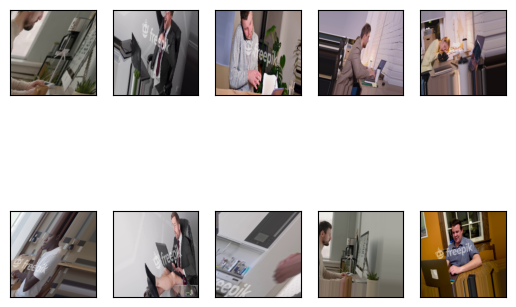

In [ ]:
#imprimir 10 img del generador de entrenamiento
for image, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image[i])
  break
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
mobilenetv2 = hub.KerasLayer(url,input_shape=(224,224,3))

In [ ]:
#congelar el modelo descargado
mobilenetv2.trainable = False

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(2,activation='softmax')
])

In [ ]:
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_4 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# # Define callbacks
# early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
# def lr_schedule(epoch, lr):
#     if epoch < 10:
#         return lr
#     else:
#         return lr * tf.math.exp(-0.1)

# lr_scheduler = LearningRateScheduler(lr_schedule)

#compilar
modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
EPOCHS=50

historial = modelo.fit(data_gen_entrenamiento, epochs=EPOCHS,batch_size=32,
                       validation_data= data_gen_pruebas)

Epoch 1/50
13/13 [==============================] - 11s 712ms/step - loss: 0.7951 - accuracy: 0.5230 - val_loss: 0.8319 - val_accuracy: 0.5000
Epoch 2/50
13/13 [==============================] - 9s 692ms/step - loss: 0.5858 - accuracy: 0.7066 - val_loss: 0.6666 - val_accuracy: 0.6429
Epoch 3/50
13/13 [==============================] - 9s 733ms/step - loss: 0.4694 - accuracy: 0.7959 - val_loss: 0.6331 - val_accuracy: 0.6531
Epoch 4/50
13/13 [==============================] - 9s 685ms/step - loss: 0.4554 - accuracy: 0.7934 - val_loss: 0.5943 - val_accuracy: 0.6939
Epoch 5/50
13/13 [==============================] - 9s 692ms/step - loss: 0.4021 - accuracy: 0.8316 - val_loss: 0.5693 - val_accuracy: 0.7653
Epoch 6/50
13/13 [==============================] - 8s 601ms/step - loss: 0.3590 - accuracy: 0.8469 - val_loss: 0.5610 - val_accuracy: 0.7347
Epoch 7/50
13/13 [==============================] - 9s 637ms/step - loss: 0.3672 - accuracy: 0.8520 - val_loss: 0.5491 - val_accuracy: 0.7143
Epoch

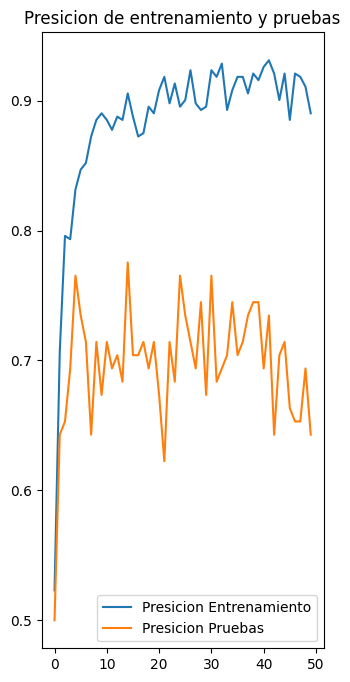

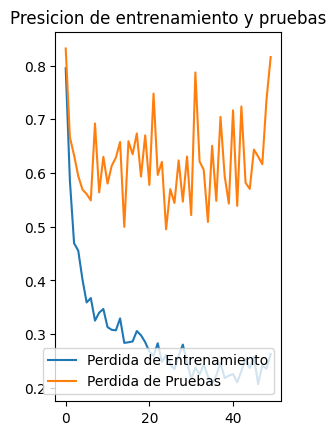

In [ ]:
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Presicion Entrenamiento')
plt.plot(rango_epocas, val_acc,label='Presicion Pruebas')
plt.legend(loc='lower right')
plt.title('Presicion de entrenamiento y pruebas')
plt.show()

plt.subplot(1,2,1)
plt.plot(rango_epocas, loss, label='Perdida de Entrenamiento')
plt.plot(rango_epocas, val_loss,label='Perdida de Pruebas')
plt.legend(loc='lower right')
plt.title('Presicion de entrenamiento y pruebas')
plt.show()


In [ ]:
import numpy as np
import cv2
import requests

def categorizar(url):
    # Read the image using OpenCV
    response = requests.get(url)
    img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

    if img is None:
        print("Error reading image from URL:", url)
        return -1

    # Resize and preprocess the image
    img = cv2.resize(img, (224, 224))
    img = img.astype(float) / 255.0

    # Reshape and predict
    prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
    return np.argmax(prediccion[0], axis=-1)

In [ ]:
#0 = bien #1 = mal
url='https://pasteboard.co/ilnnQy5hXjya.jpg'
prediccion = categorizar(url)
print(prediccion)

Error reading image from URL: https://pasteboard.co/ilnnQy5hXjya.jpg
-1
